# Research of advertisements for the sale of apartments

At your disposal are data from the Yandex.Real Estate service - an archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your job is to set the parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity.

For each apartment for sale, two types of data are available. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and pond.

**Purpose of the study:**

- identify typical and atypical indicators in advertisements for the sale of apartments;
- identify the dependence of the cost of apartments on various factors (for example, area, number of rooms, etc.)

**Research progress:**

The data will be obtained from the dataset: /datasets/real_estate_data.csv
There is no information about the quality of the data, which will require review and preprocessing.

Then I will add the necessary columns and conduct exploratory data analysis.

The research will take place in 6 stages:

- Data overview
- Preprocessing
- Adding new calculated columns
- Examination of data for the presence of atypical values and exclusion of them from further analysis
- Data research to determine typical parameters and dependencies
- Formation of a general conclusion on the study

# 1. General information about the dataframe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# open the file with delimiter "\"
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
# get general information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The dataframe contains 22 columns and 23,699 rows of data.
Most of the columns are of real type, 3 each of integer and string and 2 of logical type.
Three columns are 38% or less complete.
The 'is_apartment' column is the least populated - by 11.7%. Some of the data clearly needs a type change, for example a column "first_day_exposition".

In [ ]:
# we get general statistical information about the dataframe
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


We will use this information in the future - when making decisions about changing data types and filling in gaps.

In [ ]:
# look at the first 10 lines of the dataframe
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Данную инфомацию будем использовать в дальнейшем - при принятии решений об изменения типов данных и заполнении пропусков.

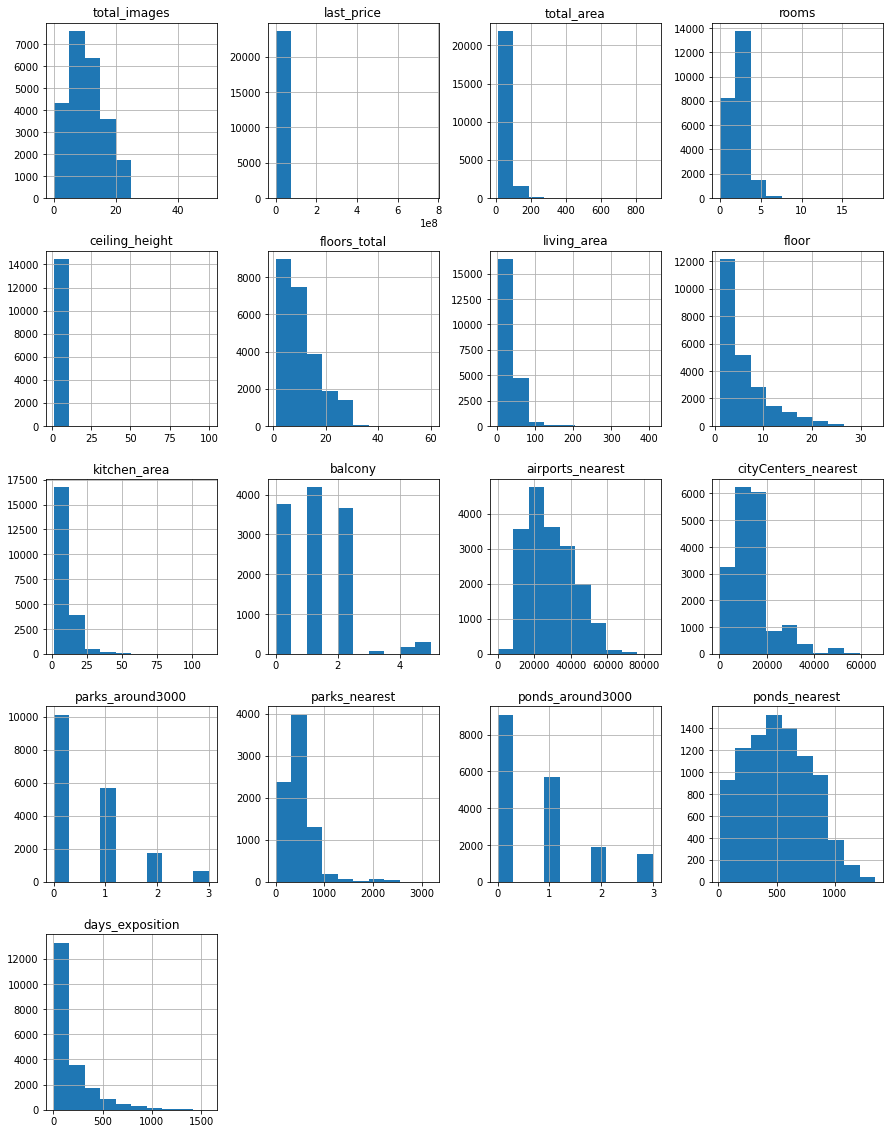

In [ ]:
# build histograms for all columns of the dataframe
df.hist(figsize=(15, 20))
plt.show()

# 2. Data preprocessing

## 2.1 Checking for complete duplicate rows

In [ ]:
df.duplicated().sum()

0

The dataframe does not contain complete obvious duplicates.

## 2.2 Preprocessing each data column

For each column we display a list of unique values and make a decision on type modification and
filling in the blanks.

In [ ]:
df['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

The data is in integer format, there are no gaps. No changes required.

In [ ]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

The data is in integer format, there are no gaps. No changes required.

In [ ]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Note the values above 10 m. In this case, the value is 10.3 m. Let us take this value as the maximum possible. The remaining values exceeding this threshold will be considered incorrectly entered and will be divided by 10 for correction.

In [ ]:
# values exceeding 10.3 are divided by 10
df.loc[df['ceiling_height']>10.3, 'ceiling_height'] = df['ceiling_height']/10

In [ ]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

The total number of floors cannot be fractional. Let's change the data type to integer. We will replace the gaps with zero values.

In [ ]:
df['floors_total'] = df['floors_total'].fillna(0).astype('int')

In [ ]:
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

The number of balconies cannot be fractional. Let's change the data type to integer. We will replace the gaps with zero values (If the number of balconies field is not filled in, there is a high probability that there is simply no balcony, which means the correct number = 0).

In [ ]:
df['balcony'] = df['balcony'].fillna(0).astype('int')

In [ ]:
df['airports_nearest'].unique()

array([18863., 12817., 21741., ..., 11751., 20151., 24665.])

The distance to the airport is expressed in meters. Replace it with kilometers, round to 2 decimal places.

In [ ]:
df['airports_nearest'] = (df['airports_nearest']/1000).round(2)

In [ ]:
df['cityCenters_nearest'].unique()

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

The distance to the city center is expressed in meters. Replace it with kilometers, round to 2 decimal places.

In [ ]:
df['cityCenters_nearest'] = (df['cityCenters_nearest']/1000).round(2)

In [ ]:
df['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

The number of parks cannot be fractional. Let's change the data type to integer. We will replace the gaps with zero values - if the number of parks is not filled, then most likely there are no parks nearby.

In [ ]:
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')

In [ ]:
df['parks_nearest'].unique()

array([4.820e+02,       nan, 9.000e+01, 8.400e+01, 1.120e+02, 3.100e+02,
       2.940e+02, 5.900e+02, 4.200e+02, 7.590e+02, 2.480e+02, 5.170e+02,
       4.110e+02, 4.520e+02, 5.320e+02, 4.590e+02, 7.250e+02, 4.700e+01,
       6.200e+02, 6.750e+02, 5.310e+02, 5.260e+02, 2.710e+02, 3.630e+02,
       6.480e+02, 3.820e+02, 3.340e+02, 1.670e+02, 4.450e+02, 2.310e+02,
       5.110e+02, 7.510e+02, 6.660e+02, 3.840e+02, 1.270e+02, 2.410e+02,
       4.880e+02, 1.560e+02, 5.760e+02, 2.850e+02, 6.330e+02, 1.500e+01,
       2.150e+02, 5.330e+02, 1.410e+02, 3.660e+02, 3.410e+02, 5.890e+02,
       3.440e+02, 5.080e+02, 4.170e+02, 7.620e+02, 4.410e+02, 5.590e+02,
       7.490e+02, 1.230e+02, 5.010e+02, 1.000e+01, 1.133e+03, 1.205e+03,
       5.160e+02, 8.600e+02, 2.760e+02, 9.800e+02, 4.630e+02, 5.910e+02,
       2.390e+02, 6.510e+02, 1.021e+03, 4.850e+02, 5.860e+02, 3.700e+02,
       6.880e+02, 2.750e+02, 5.460e+02, 4.660e+02, 1.390e+02, 2.510e+02,
       5.370e+02, 6.270e+02, 1.040e+02, 4.500e+02, 

Convert the distance in meters to kilometers, rounding to two decimal places. Let's fill in the blanks with zero values - if the distance to the nearest park is not filled in (not defined), there is probably no park nearby.

In [ ]:
df['parks_nearest'] = (df['parks_nearest']/1000).round(2).fillna(0)

In [ ]:
df['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

The quantity cannot be fractional - let's change the data type to integer. We will replace the gaps with zero values - if the information about the nearest body of water is not filled in, it means there are none nearby.

In [ ]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')

In [ ]:
df['ponds_nearest'].unique()

array([ 755.,   nan,  574., ...,  959.,   40., 1134.])

The distance to the nearest body of water is indicated in meters, but due to the presence of gaps, the column is stored in integer format. Let's convert the distance into kilometers, round to two decimal places, fill in the gaps with zero values - if the distance to the nearest body of water is not determined, then there are probably no bodies of water.

In [ ]:
df['ponds_nearest'] = (df['ponds_nearest']/1000).round(2).fillna(0)

In [ ]:
df['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

The number of days the ad was posted cannot be a fraction. However, the presence of gaps will not allow you to change the data type. And replacing gaps with a constant can affect the quality of the statistical characteristics of the data. Therefore, we leave it as is. However, given that this is a calculated parameter, it will be necessary to draw the attention of those. who is responsible for uploading data - perhaps there is an error in the upload or autofill algorithms for this parameter.

In [ ]:
#df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

In [ ]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
len(df['locality_name'].unique())

365

Two points are noteworthy:
- there are implicit duplicates due to the use of the letter “е” in names where it is possible to use “e”. Let's fix this by replacing "е" with "e".
- there are a number of settlements with the same names, but different types ("village", "village", etc.). Let's correct this by bringing all the same names to one type of settlement.

Let's pay attention. Before adjustments, there are 365 “unique” values in the column.

In [ ]:
# replace ё with e
df['locality_name'] = df['locality_name'].str.replace('ё','е')

# we replace settlements with the same names, but different types
df['locality_name'] = df['locality_name'].replace(
  {'городской поселок Павлово': 'поселок городского типа Павлово',
   'село Павлово':'поселок городского типа Павлово',
   'поселок городского типа Рябово':'поселок Рябово',
   'садовое товарищество Приладожский':'поселок городского типа Приладожский',
   'деревня Федоровское':'городской поселок Федоровское',
   'деревня Гарболово':'поселок Гарболово',
   'садовое товарищество Рахья':'поселок городского типа Рахья',
   'деревня Зимитицы':'поселок Зимитицы',
   'поселок при железнодорожной станции Вещево':'поселок станции Вещево',
   'деревня Калитино':'посеклок Калитино',
   'городской поселок Большая Ижора':'поселок городского типа Большая Ижора',
   'городской поселок Назия':'поселок городского типа Назия',
   'деревня Кудрово':'Кудрово',
   'деревня Рабитицы':'поселок Рабитицы',
   'коттеджный поселок Лесное':'поселок Лесное',
   'городской поселок Рощино':'поселок городского типа Рощино',
   'городской поселок Лесогорский':'поселок городского типа Лесогорский',
   'городской поселок Советский':'поселок городского типа Советский',
   'поселок Любань':'Любань',
   'поселок при железнодорожной станции Приветнинское':'поселок станции Приветнинское',
   'городской поселок Мга':'поселок городского типа Мга',
   'деревня Щеглово':'поселок Щеглово',
   'поселок Мурино':'Мурино',
   'село Никольское':'Никольское'}
)

In [ ]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'городской поселок Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сл

In [ ]:
len(df['locality_name'].unique())

308

Please note. After adjusting the unique values, only 308 remained.

The First Day of Posting column needs to be converted to a date format. At the same time, the placement time is not indicated (00:00:00 is indicated), which means that during conversion it is enough to save only the date.

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format ='%Y-%m-%d')

The logical field "Is an apartment" is filled in the minimum number of times compared to all other columns. It is possible that this field was entered last and has not been filled in previously. Therefore, only information where this field has the value “True” is valuable; unfilled values can be replaced with “False” without loss of data quality.

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Due to the fact that the sale price of real estate is usually expressed in whole rubles, the value of the “Final price” column can be converted into an integer format without loss of data quality.

In [ ]:
df['last_price'] = df['last_price'].astype('int')

After the transformations, we will once again display general information about the dataframe, which will allow you to see changes in the number of gaps and data types by column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [ ]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18.86,16.03,1,0.48,2,0.76,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,поселок Шушары,12.82,18.60,0,0.00,0,0.00,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21.74,13.93,1,0.09,2,0.57,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28.10,6.80,2,0.08,3,0.23,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31.86,8.10,2,0.11,1,0.05,121.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,9.10,0,городской поселок Янино-1,NaN,NaN,0,0.00,0,0.00,55.0
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,14.40,1,поселок Парголово,53.00,19.14,0,0.00,0,0.00,155.0
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23.98,11.63,0,0.00,0,0.00,NaN
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,8.81,0,Мурино,NaN,NaN,0,0.00,0,0.00,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50.90,15.01,0,0.00,0,0.00,289.0


**Conclusion according to point 2**

The dataframe has been preprocessed. The dataframe did not contain any obvious duplicates, non-obvious duplicates in the “locality_name” column were eliminated through dictionary replacement, field types were converted from real to integer and from string to date. Gaps are filled with zero values where this does not affect the quality of the data after such filling.
The dataframe is ready for the next stage of research.

## Adding new calculated columns to the table

Add a price per square meter column.

In [ ]:
df['price_per_sq_m'] = (df['last_price']/df['total_area']).round(2)

Add a column for the day of the week the ad was posted.

In [ ]:
df['week_day_exposition'] = df['first_day_exposition'].dt.weekday

Add a column for the month the ad was placed.

In [ ]:
df['month_exposition'] = df['first_day_exposition'].dt.month

Add a column for the year the ad was placed.

In [ ]:
df['year_exposition'] = df['first_day_exposition'].dt.year

Add a "floor type" column using the function.

In [ ]:
# create a function that sorts the floor type from the ad
def floor_type (row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

# apply the function to the dataframe
df['floor_type'] = df.apply(floor_type, axis=1)

Add a column with distances to the city center rounded to whole kilometers

In [ ]:
df['cityCenters_nearest_int_km'] = (df['cityCenters_nearest']).round(0)

We re-display the first 10 rows of the dataframe to see the changes made (added columns).

In [ ]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,week_day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_int_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,0.48,2,0.76,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0.00,0,0.00,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,0.09,2,0.57,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,0.08,3,0.23,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,0.11,1,0.05,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0.00,0,0.00,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0.00,0,0.00,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,0.00,0,0.00,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,0.00,0,0.00,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.00,0,0.00,289.0,88524.59,6,2,2017,другой,15.0


**Conclusion according to clause 3.**

In accordance with the task, the dataframe was supplemented with additional 6 columns:
- price per square meter
- day of week of publication
- month of publication
- year of publication
- floor type
- distance to the city center in whole kilometers.

## Examine individual columns of data and eliminate anomalous values

We will conduct the study using a single algorithm: we use the “describe” method and build a histogram. We evaluate the numerical characteristics of the column values. If there are significantly outliers from the total number, we set a boundary and filter the dataframe along this boundary, overwriting it.

In [ ]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

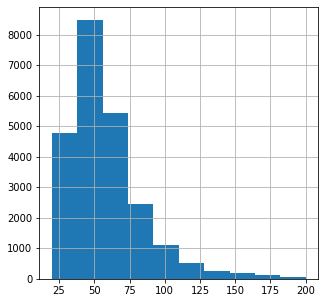

In [ ]:
df['total_area'].hist(figsize=(5,5), range=(20,200));

In [ ]:
df[df['total_area']>330]['total_area'].count()

46

It can be seen that the overwhelming majority of values are concentrated within the boundaries (0, 330).

And advertisements where the total area exceeds 330 sq.m. 46 in total (out of 23,699). Let's filter the dataframe - leave ads with a total area of less than 330 sq.m. Let's build an updated histogram.

In [ ]:
df=df[df['total_area']<330]

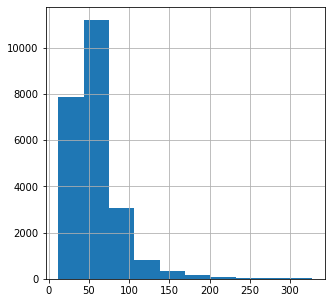

In [ ]:
df['total_area'].hist(figsize=(5,5));

In [ ]:
df['living_area'].describe()

count    21762.000000
mean        34.135812
std         20.260297
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        255.700000
Name: living_area, dtype: float64

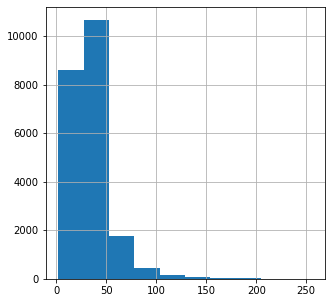

In [ ]:
df['living_area'].hist(figsize=(5,5));

The maximum value of living area of 255.7 sq.m. is not critically different from other values (median value 30 sq.m.). We leave it without adjustments.

In [ ]:
df['kitchen_area'].describe()

count    21385.000000
mean        10.521710
std          5.723878
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

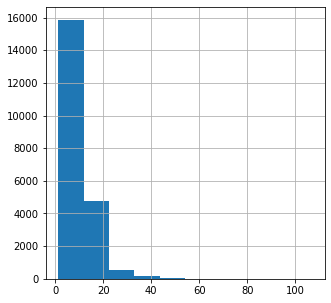

In [ ]:
df['kitchen_area'].hist(figsize=(5,5));

The maximum value of the kitchen area of 107 sq.m. is not critically different from the other values (median value 9.1 sq.m.). We leave it without adjustments.

In [ ]:
df['last_price'].describe()

count    2.365300e+04
mean     6.343002e+06
std      7.999965e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.630000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

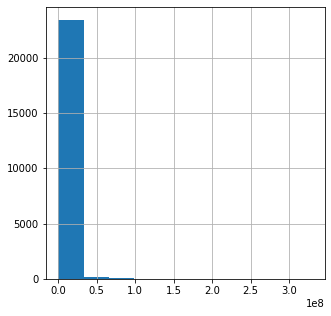

In [ ]:
df['last_price'].hist(figsize=(5,5));

In [ ]:
df[df['last_price']>30000000]['last_price'].count()

275

The maximum value of the final price is 330 million rubles. critically exceeds the average and median values (6.3 million rubles and 4.6 million rubles). At the same time, the number of advertisements in the dataframe with a price of over 30 million rubles. is only 275 (out of 23,699). Let's filter the dataframe by value less than 30 million rubles. and generate an updated histogram.

In [ ]:
df=df[df['last_price']<30000000]

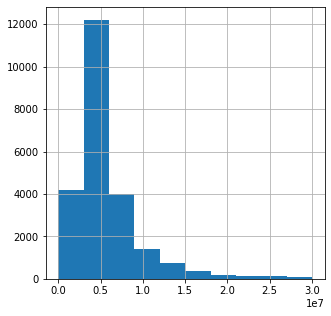

In [ ]:
df['last_price'].hist(figsize=(5,5));

In [ ]:
df['rooms'].describe()

count    23368.000000
mean         2.038386
std          1.023843
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

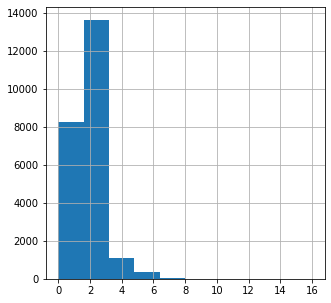

In [ ]:
df['rooms'].hist(figsize=(5,5));

In [ ]:
df[df['rooms']>8]['rooms'].count()

11

The maximum value of the number of rooms is 16, which is significantly higher than the mean and median value (2). At the same time, the number of advertisements in the dataframe with the number of rooms over 8 is only 11 (out of 23,699). Let's filter the dataframe by a value less than 8 rooms and generate an updated histogram.

In [ ]:
df=df[df['rooms']<8]

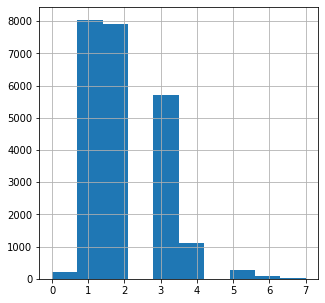

In [ ]:
df['rooms'].hist(figsize=(5,5));

In [ ]:
df['ceiling_height'].describe()

count    14268.000000
mean         2.718971
std          0.291494
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

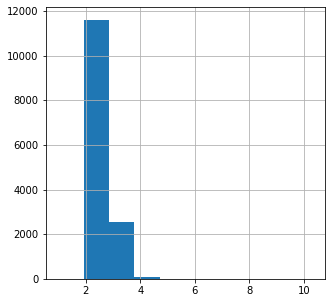

In [ ]:
df['ceiling_height'].hist(figsize=(5,5));

In [ ]:
df[df['ceiling_height']>5]['ceiling_height'].count()

8

The maximum ceiling height is 10.3 m. It is significantly higher than the average and median values (2.71 m and 2.65 m). At the same time, the number of advertisements in the dataframe with a ceiling height above 5m is only 8 (out of 23,699). Let's filter the dataframe by ceiling height value less than 5m and generate an updated histogram.

In [ ]:
df=df[df['ceiling_height']<5]

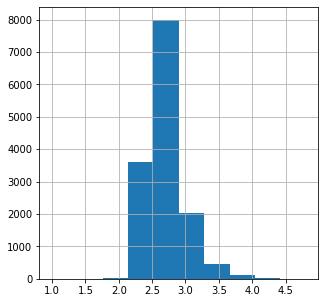

In [ ]:
df['ceiling_height'].hist(figsize=(5,5));

In [ ]:
df['floor'].describe()

count    14259.000000
mean         5.632583
std          4.635169
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: floor, dtype: float64

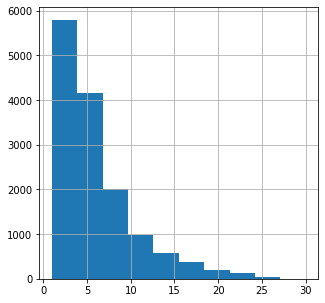

In [ ]:
df['floor'].hist(figsize=(5,5));

In [ ]:
df[df['floor']>28]['floor'].count()

2

The maximum floor value of 30 is significantly higher than the mean and median value (5.6 and 4). At the same time, the number of advertisements in a dataframe with more than 28 floors is only 2 (out of 23,699). Let's filter the dataframe by a value less than the 28th floor and generate an updated histogram.

In [ ]:
df=df[df['floor']<28]

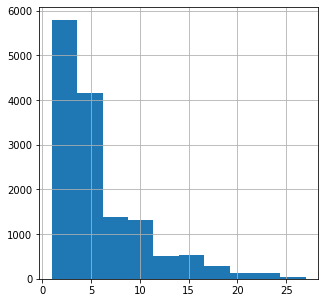

In [ ]:
df['floor'].hist(figsize=(5,5));

In [ ]:
df['floor_type'].describe()

count      14257
unique         3
top       другой
freq       10415
Name: floor_type, dtype: object

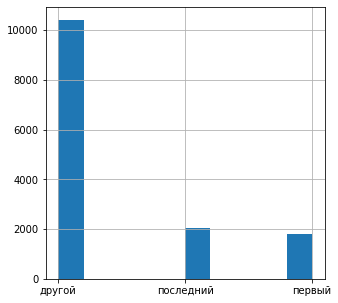

In [ ]:
df['floor_type'].hist(figsize=(5,5));

There are approximately equal numbers of advertisements with apartments on the first or last floors, which, even in total, are significantly inferior to the “other” type of floors. Which is logical.

In [ ]:
df['floors_total'].describe()

count    14257.000000
mean        10.205022
std          6.221071
min          0.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

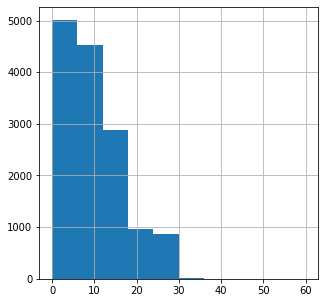

In [ ]:
df['floors_total'].hist(figsize=(5,5));

In [ ]:
df[df['floors_total']>30]['floors_total'].count()

12

The maximum number of floors of a building is 60, which significantly exceeds the average and median values (10.2 and 9). At the same time, the number of advertisements in a dataframe with more than 30 storeys is only 12 (out of 23,699). Let's filter the dataframe by a value less than 30 floors and generate an updated histogram.

In [ ]:
df=df[df['floors_total']<30]

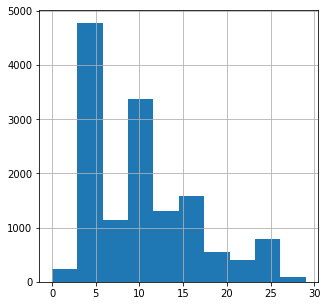

In [ ]:
df['floors_total'].hist(figsize=(5,5));

In [ ]:
(df['cityCenters_nearest']*1000).describe()

count    11309.00000
mean     14234.84393
std       8743.92075
min        210.00000
25%       9430.00000
50%      13060.00000
75%      16080.00000
max      65970.00000
Name: cityCenters_nearest, dtype: float64

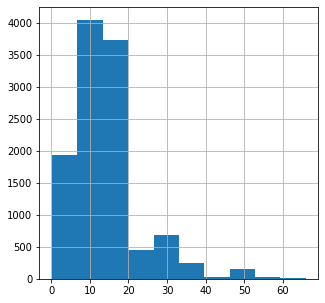

In [ ]:
df['cityCenters_nearest'].hist(figsize=(5,5));

Maximum distance to city center = 66 km. not critically different from the median value (13 km.). We leave it as is.

In [ ]:
df['airports_nearest'].describe()

count    11292.000000
mean        28.874379
std         12.720946
min          0.000000
25%         18.450000
50%         26.810000
75%         37.315000
max         84.870000
Name: airports_nearest, dtype: float64

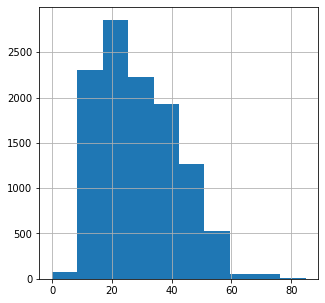

In [ ]:
df['airports_nearest'].hist(figsize=(5,5));

Maximum distance to airport = 84.8 km. not critically different from the median value (26.8 km). We leave it as is.

In [ ]:
df['parks_nearest'].describe()

count    14245.000000
mean         0.172116
std          0.299805
min          0.000000
25%          0.000000
50%          0.000000
75%          0.330000
max          3.190000
Name: parks_nearest, dtype: float64

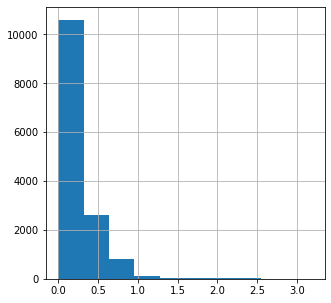

In [ ]:
df['parks_nearest'].hist(figsize=(5,5));

Maximum distance to the park = 3.1 km. not critically different from the median value (0 km.). We leave it as is.

In [ ]:
df['week_day_exposition'].describe()

count    14245.000000
mean         2.500386
std          1.790511
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: week_day_exposition, dtype: float64

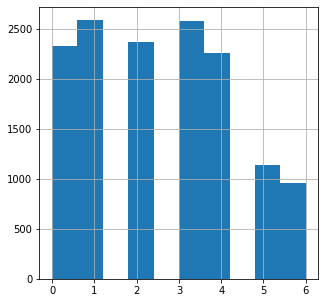

In [ ]:
df['week_day_exposition'].hist(figsize=(5,5));

No abnormal values were found. At the same time, you can notice that significantly fewer advertisements are posted on weekends than on weekdays.

In [ ]:
df['month_exposition'].describe()

count    14245.000000
mean         6.325939
std          3.500027
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

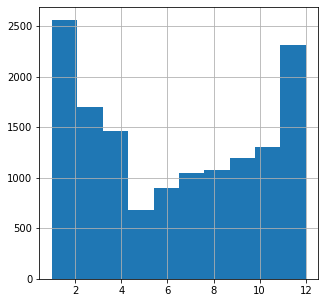

In [ ]:
df['month_exposition'].hist(figsize=(5,5));

No abnormal values were found. At the same time, you can notice that the minimum number of advertisements is placed in May, then until January the average monthly placement increases, and then from February to May it decreases.

**Conclusion according to point 4**

Individual columns of the dataframe were examined for the presence of anatomical values.
For those columns where such values were identified, the dataframe was filtered, in which the volume of the dataframe is reduced by units and fractions of a percent, while individual outliers are excluded, which has a positive effect on the statistical indicators of the data in the studied columns, bringing the average value and median closer together.

## Exploratory data analysis

In [ ]:
df['days_exposition'].describe()

count    11864.000000
mean       188.586059
std        226.894724
min          1.000000
25%         45.000000
50%        102.500000
75%        245.000000
max       1580.000000
Name: days_exposition, dtype: float64

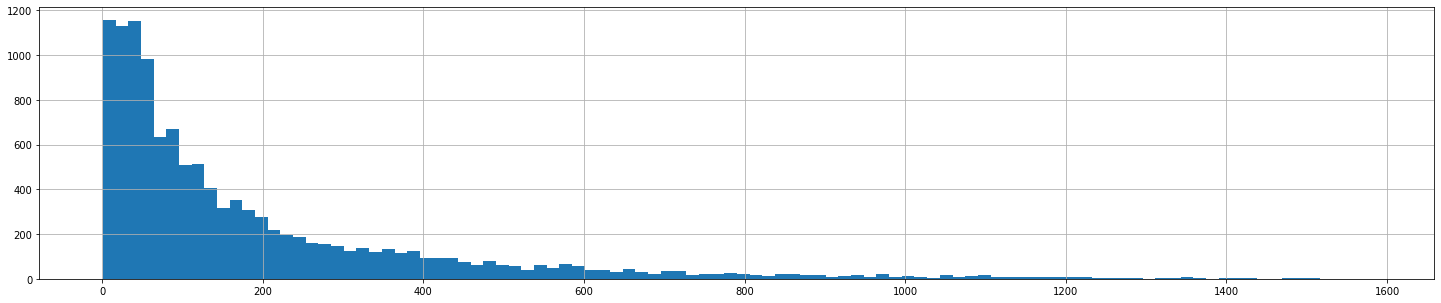

In [ ]:
df['days_exposition'].hist(figsize=(25,5), bins=100);

In [ ]:
(df[df['days_exposition']>0]['days_exposition']).describe()

count    11864.000000
mean       188.586059
std        226.894724
min          1.000000
25%         45.000000
50%        102.500000
75%        245.000000
max       1580.000000
Name: days_exposition, dtype: float64

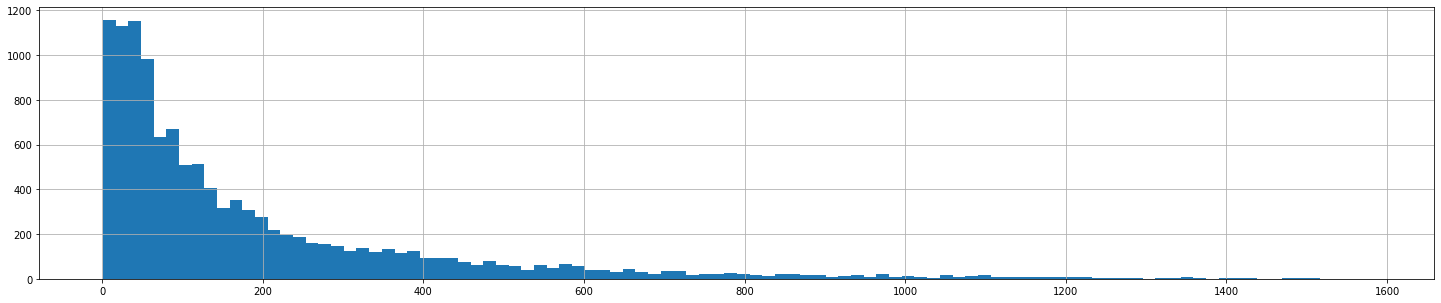

In [ ]:
(df[df['days_exposition']>0]['days_exposition']).hist(figsize=(25,5), bins=100);

It can be noted that 2,381 were posted within 0 days, there is probably something wrong with these ads. We will not take them into account in the analysis.
When excluding such advertisements, the average posting time was 188 days and the median was 102 days. The average value significantly exceeds the median due to the presence of maximum values of 1,580 days (more than 4 years!).
Thus, we can conclude that the normal placement period is a period of 102 days, anything less can be considered quick sales (for example, 45 days). And sales over a period of over 330 days are unusually long.

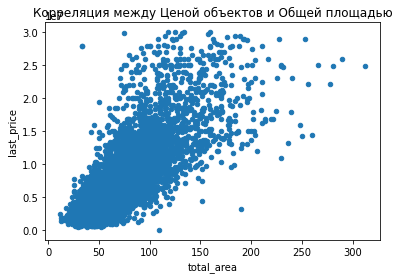

In [ ]:
 df.plot(x='total_area', y='last_price', kind='scatter', title='Корреляция между Ценой объектов и Общей площадью');

In [ ]:
df['total_area'].corr(df['last_price'])

0.7925212906466064

The Price versus Area graph shows a significant positive correlation. Which is logical and confirmed by the high Pearson correlation coefficient **0.79**. Typically, the larger the total area, the higher the final price of the property.

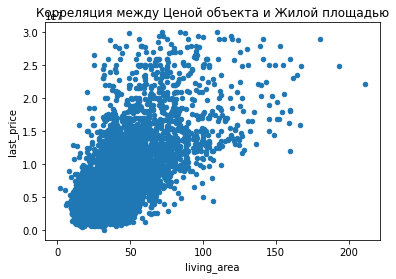

In [ ]:
df.plot(x='living_area', y='last_price', kind='scatter', title = 'Корреляция между Ценой объекта и Жилой площадью');

In [ ]:
df['living_area'].corr(df['last_price'])

0.6900163455338157

The Price versus Living Area graph shows a significant positive correlation, which is confirmed by the Pearson correlation coefficient **0.69**. Which is logical. Typically, the larger the area, the higher the final price of the property.

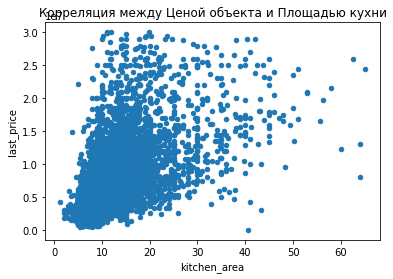

In [ ]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', title = 'Корреляция между Ценой объекта и Площадью кухни');

In [ ]:
df['kitchen_area'].corr(df['last_price'])

0.6040490096929232

A graph of the relationship between Prices and Kitchen Area shows a definite positive correlation. This suggests a definite connection between the growth of the kitchen area and the increase in the overall cost of the property. At the same time, this connection is more “blurred” in comparison with the two previous indicators. Those. its influence is significantly lower. The Pearson correlation coefficient **0.6** is still significant, but significantly smaller compared to the previous indicators (total area (0.79) and living area (0.69)).

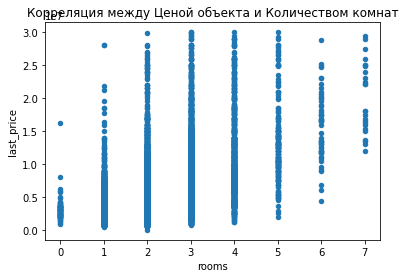

In [ ]:
df.plot(x='rooms', y='last_price', kind='scatter', title = 'Корреляция между Ценой объекта и Количеством комнат');

In [ ]:
df['rooms'].corr(df['last_price'])

0.5172896323277083

The Pearson correlation coefficient is insignificant. The study of dependence must be carried out using other indicators. Let us conduct a study of the dependence of the median cost of objects on the number of rooms.

In [ ]:
rooms_pivot_table=df.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'median'])
rooms_pivot_table.columns=['mean', 'median']
rooms_pivot_table

,mean,median
rooms,,
0,3.223515e+06,3000000
1,3.887915e+06,3650000
2,5.596919e+06,4900000
3,7.560801e+06,6200000
4,1.047443e+07,8882500
5,1.340363e+07,12450000
6,1.582958e+07,16490000
7,2.009600e+07,18000000


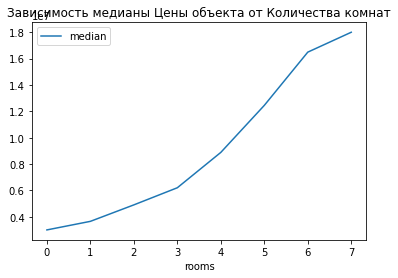

In [ ]:
rooms_pivot_table.plot(y = 'median', title = 'Зависимость медианы Цены объекта от Количества комнат');

Despite the lack of correlation between the number of rooms and the price of an object, as such, the dependence of the median value of the cost of an object with a different number of rooms indicates a proportional relationship. In general, properties with more rooms are more expensive.

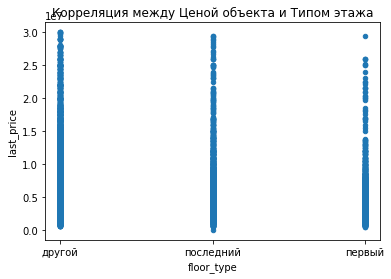

In [ ]:
df.plot(x='floor_type', y='last_price', kind='scatter', title = 'Корреляция между Ценой объекта и Типом этажа');

In [ ]:
floor_type_pivot_table=df.pivot_table(index='floor_type', values='last_price', aggfunc=['mean', 'median'])
floor_type_pivot_table.columns=['mean', 'median']
floor_type_pivot_table

,mean,median
floor_type,,
другой,6.208128e+06,5000000
первый,4.752754e+06,4000000
последний,5.817717e+06,4500000


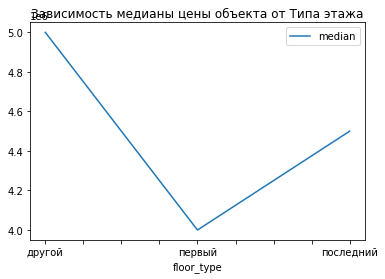

In [ ]:
floor_type_pivot_table.plot(y = 'median', title = 'Зависимость медианы цены объекта от Типа этажа');

Despite the lack of correlation between the type of floor and the price of the object, as such, the dependence of the median value of the cost of the object on the type of floor suggests the following: the cheapest objects are objects on the first floor, the most expensive ones are not on the first and not on the last.

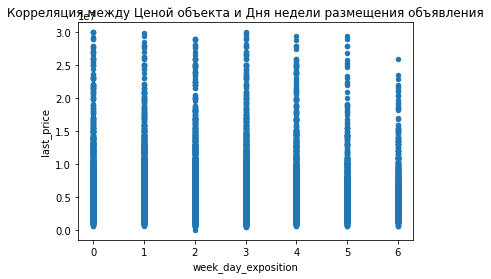

In [ ]:
df.plot(
    x='week_day_exposition', y='last_price', kind='scatter',
    title = 'Корреляция между Ценой объекта и Дня недели размещения объявления');

In [ ]:
df['week_day_exposition'].corr(df['last_price'])

-0.030964263384004213

Due to the almost complete (Pearson correlation coefficient **0.03(!)**) lack of correlation between the day of placement and the price of the object, **as such**, it is necessary to consider the dependence of the median value of the cost of the object on the day of the week of the object’s placement. Let's look at it below.

In [ ]:
week_day_pivot_table=df.pivot_table(index='week_day_exposition', values='last_price', aggfunc=['mean', 'median'])
week_day_pivot_table.columns=['mean', 'median']
week_day_pivot_table

,mean,median
week_day_exposition,,
0,6.039291e+06,4850000
1,6.071623e+06,4980000
2,6.061151e+06,4800000
3,6.084891e+06,4800000
4,5.845181e+06,4700000
5,5.668313e+06,4650000
6,5.614610e+06,4600000


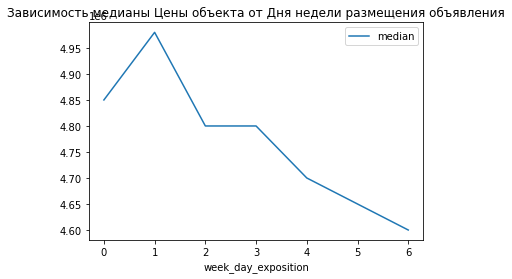

In [ ]:
week_day_pivot_table.plot(y = 'median', title = 'Зависимость медианы Цены объекта от Дня недели размещения объявления');

Despite the lack of correlation between the day of the week of placement and the price of the object, as such, the dependence of the median value of the cost of the object on the day of the week suggests the following: the most expensive objects are placed on Monday and Tuesday - at the beginning of the week, and the cheapest on the weekend.

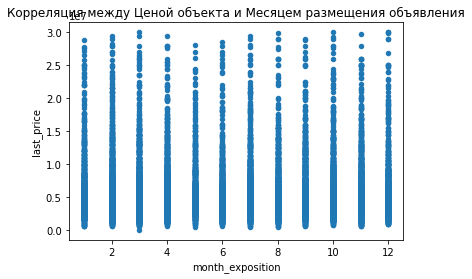

In [ ]:
df.plot(
    x='month_exposition', y='last_price',
    kind='scatter', title = 'Корреляция между Ценой объекта и Месяцем размещения объявления');

In [ ]:
df['month_exposition'].corr(df['last_price'])

0.004358797058645422

Due to the complete (Pearson correlation coefficient **0.004(!)**) lack of correlation between the month of placement and the price of the object, **as such**, it is necessary to consider the dependence of the median value of the cost of the object on the month of placement of the object. Let's look at it below.

In [ ]:
month_day_pivot_table=df.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean', 'median'])
month_day_pivot_table.columns=['mean', 'median']
month_day_pivot_table

,mean,median
month_exposition,,
1,6.129574e+06,4875000
2,5.973259e+06,4900000
3,5.734006e+06,4700000
4,6.055483e+06,4990000
5,6.016712e+06,4800000
6,5.726556e+06,4600000
7,6.146782e+06,4895000
8,5.975304e+06,4800000
9,6.054926e+06,4800000


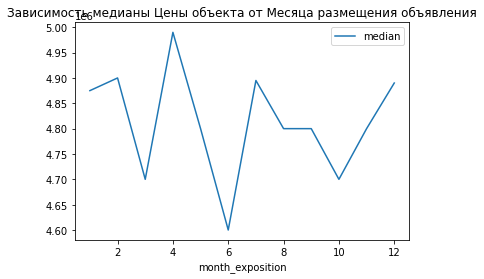

In [ ]:
month_day_pivot_table.plot(y = 'median', title = 'Зависимость медианы Цены объекта от Месяца размещения объявления');

A clear relationship between the month of placement and the price of the object cannot be traced either by correlation or by median values. However, it can be noted that the cheapest properties are placed in June, and the most expensive in April. This indicates that there is a certain seasonality in the apartment sales market in St. Petersburg and the Leningrad region.

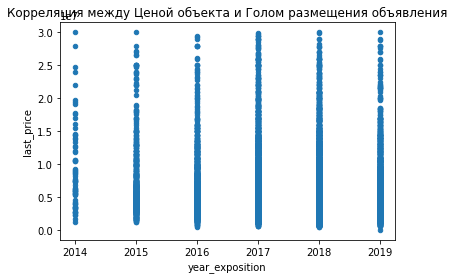

In [ ]:
df.plot(
    x='year_exposition', y='last_price', kind='scatter',
    title = 'Корреляция между Ценой объекта и Голом размещения объявления');

In [ ]:
df['year_exposition'].corr(df['last_price'])

-0.0519543929082272

Due to the almost complete (Pearson correlation coefficient **0.05(!)**) lack of correlation between the year of placement and the price of the object, **as such**, it is necessary to consider the dependence of the median value of the cost of the object on the year of placement of the object. Let's look at it below.

In [ ]:
year_pivot_table=df.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'median'])
year_pivot_table.columns=['mean', 'median']
year_pivot_table

,mean,median
year_exposition,,
2014,9.589320e+06,7540000
2015,7.111411e+06,5500000
2016,6.136533e+06,4800000
2017,5.974236e+06,4650000
2018,5.689352e+06,4700000
2019,6.159461e+06,5190000


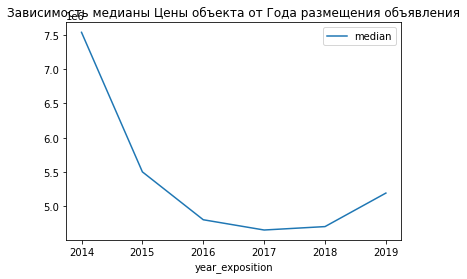

In [ ]:
year_pivot_table.plot(y = 'median', title = 'Зависимость медианы Цены объекта от Года размещения объявления');
plt.show()

Despite the lack of correlation between the year of placement and the price of the object, as such, the dependence of the median value of the cost of the object on the year of placement suggests the following: in the period from 2014 to 2017, the cost of objects decreased, with the most significant annual decrease observed in 2014. After 2017, there was a slow increase in value, which accelerated in 2018. Below we will conduct an additional factor analysis of changes in the cost of objects depending on the total area and price per square meter. Let's determine how these factors influenced the change over the years.

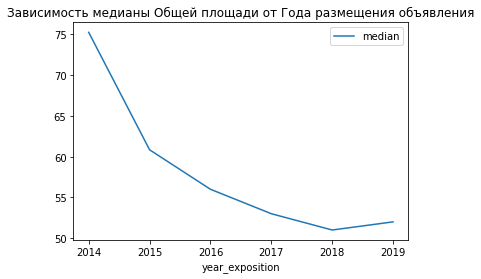

In [ ]:
year_sqr_pivot_table=df.pivot_table(index='year_exposition', values='total_area', aggfunc=['mean', 'median'])
year_sqr_pivot_table.columns=['mean', 'median']
year_sqr_pivot_table
year_sqr_pivot_table.plot(y = 'median', title = 'Зависимость медианы Общей площади от Года размещения объявления')
plt.show()

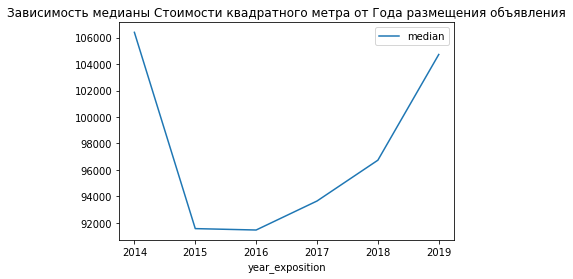

In [ ]:
year_sqr_price_pivot_table=df.pivot_table(index='year_exposition', values='price_per_sq_m', aggfunc=['mean', 'median'])
year_sqr_price_pivot_table.columns=['mean', 'median']
year_sqr_price_pivot_table
year_sqr_price_pivot_table.plot(
    y = 'median', title = 'Зависимость медианы Стоимости квадратного метра от Года размещения объявления')
plt.show()

Factor analysis of changes in the cost of accommodation facilities over the years leads us to the following conclusions:

- in 2014, there was a significant decrease in both the average total area of apartments sold and the average cost per square meter;
- in 2015, the decrease in the average total area continued, and the decrease in the average cost stopped, but both factors together led to a continued decrease in the average cost of objects;
- in 2016 and 2017 we observe multidirectional dynamics: the average area will continue to decline, and the average cost per square meter begins to grow **significantly**, which leads to a change in the trend for the total area in 2017 (transition to growth)
- in 2018, strong growth in the average cost per square meter continues, which is supported by an increase in the average total area of objects, which together leads to an increase in the growth of the total cost of objects.

In [ ]:
local_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_per_sq_m', aggfunc=['count', 'median'])
local_pivot_table.columns = ['count', 'median']
local_pivot_table = local_pivot_table.sort_values('count', ascending = False).round(2).head(10)
local_pivot_table

,count,median
locality_name,,
Санкт-Петербург,9849,105032.82
Всеволожск,272,65737.87
Пушкин,234,100000.00
Мурино,228,86432.67
поселок Шушары,217,77735.85
Колпино,203,74725.27
Кудрово,195,96540.97
Гатчина,149,68604.65
Петергоф,145,82142.86


In [ ]:
#highest cost
local_pivot_table[local_pivot_table['median']==local_pivot_table['median'].max()]

,count,median
locality_name,,
Санкт-Петербург,9849,105032.82


In [ ]:
#lowest cost
local_pivot_table[local_pivot_table['median']==local_pivot_table['median'].min()]

,count,median
locality_name,,
Всеволожск,272,65737.87


Of the settlements with the largest number of advertisements, the most expensive (by the criterion of median price per square meter), as expected, was St. Petersburg, and the cheapest was Vsevolozhsk.

In [ ]:
spb_pivot_table = (

df.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_int_km', values = 'last_price')

)
spb_pivot_table

,last_price
cityCenters_nearest_int_km,
0.0,1.197333e+07
1.0,1.233706e+07
2.0,1.146350e+07
3.0,9.688966e+06
4.0,1.081526e+07
5.0,1.093285e+07
6.0,9.741272e+06
7.0,8.804436e+06
8.0,9.158674e+06


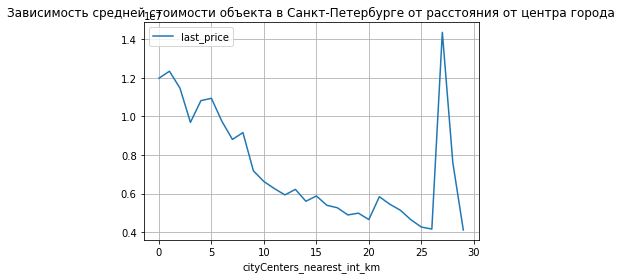

In [ ]:
spb_pivot_table.plot(
    grid=True, title = 'Зависимость средней стоимости объекта в Санкт-Петербурге от расстояния от центра города');

The average cost of properties, as expected, decreases with distance from the city center. From 12 million rubles. in the center up to 4 million rubles. at a distance of 25 km. At the same time, there is a sharp increase in the cost of objects at a distance of 28 km. from the center of St. Petersburg. This is probably due to the presence of a separate, particularly expensive settlement at this distance.

**Conclusion according to point 5**

A research analysis of the dataframe data was carried out, the results of which noted the following:

- the normal period for posting an advertisement is 102 days;
- there is a clear direct relationship between the area of the property (general and residential), as well as the number of rooms and the price of the property. At the same time, a similar dependence on the kitchen area is much less clear;
- the first floors are the cheapest, then the last floors follow, and all the rest are more expensive than both the first and last;
- the most expensive properties are posted on Monday and Tuesday, as well as in April, and the cheapest ones are posted on weekends and in June.
- From 2014 to 2017 there was a decline in the market, and from 2017 there was a slight but increasing growth
- the most expensive properties, according to the average cost per square meter, are located in St. Petersburg, and the cheapest in Vsevolozhsk.
- in general, with increasing distance from the center of St. Petersburg, the cost of objects decreases by approximately 0.3 million rubles. for every km.

## General conclusion

The study analyzed a data frame with information on apartment sales in St. Petersburg and the Leningrad region for the period 2014 - 2019. Sample size 23,699 rows.
During the research, data preprocessing was carried out: the formats of individual columns were changed, implicit duplicates were eliminated, gaps were filled, where this did not affect the quality of data statistics, anomalous values in individual columns were examined and the dataframe was filtered to exclude rows with anomalous values.

As a result of the analysis:
- the “normal” period for posting an ad is defined = 102 days;
- a direct relationship has been established between the cost of the object and its area and number of rooms;
- it was revealed that the most expensive objects are placed at the beginning of the week (Tuesday), and the cheapest - on the weekend;
- the presence of seasonality in the market has been established, in which the most expensive properties are placed in April, and the cheapest in June;
- it was discovered that since 2017 the market has begun to grow, after a three-year period of decline;
- a factor analysis of the market was carried out for the entire period, it was found that in 2014-2015 the decline in the market was associated both with a decrease in the total area of apartments sold and with a decrease in the average cost per square meter, then, from 2016a, the cost per square meter begins to increase, and after Since 2018, the area of objects sold has also begun to grow;
- of the most frequent advertisements, the lowest average cost of objects was recorded in Vsevolozhsk, and the highest in St. Petersburg;
- it was found that the average cost of objects decreases with distance from the center of St. Petersburg at an approximate rate of 0.3 million rubles. / km.